# MSC DA CA1

# Machine Learning model - GridSearchCV 


Machine learning models have a wide range of uses, including prediction, classification, and clustering. It is advised that you assess several approaches (at least two), choose appropriate hyperparameters for the optimal outcomes of Machine Learning models using an approach of hyperparameter tunning, such as GridSearchCV or RandomizedSearchCV. 

### The dataset can be downloaded here: https://data.cso.ie/product/pme

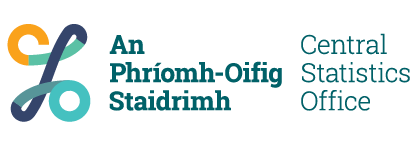

In [1]:
from IPython.display import Image
Image(filename =r'cso_image.png', width = 600, height = 300)

### Data Understanding
###### First load the data and understand the attributes meanings, shape of the dataset etc.

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

In [4]:
df_all_data = pd.read_excel(r"C:\Users\stphn\Documents\CCT\Assessment\PEA25_estimated_population.xlsx", sheet_name="Unpivoted")
#print(df_all_data.head())

In [5]:
# look at dimensions of the df
df_all_data.shape

(324, 6)

In [6]:
# ensure that data type are correct
df_all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Statistic Label  324 non-null    object 
 1   Year             324 non-null    int64  
 2   Sex              324 non-null    object 
 3   Citizenship      324 non-null    object 
 4   UNIT             324 non-null    object 
 5   VALUE            324 non-null    float64
dtypes: float64(1), int64(1), object(4)
memory usage: 15.3+ KB


## Data Preparation

Let's now conduct some prelimininary data preparation steps, i.e. rescaling the variables, splitting into train and test etc. To understand why rescaling is required, let's print the summary stats of all columns - you'll notice that the columns at the end (capital_run_length_longest, capital_run_length_total etc.) have much higher values (means = 52, 283 etc.) than most other columns which represent fraction of word occurrences (no. of times word appears in email/total no. of words in email).

In [7]:
df_all_data.describe()

,Year,VALUE
count,324.000000,324.000000
mean,2014.500000,1052.622531
std,5.196152,1492.635331
min,2006.000000,21.300000
25%,2010.000000,58.975000
50%,2014.500000,121.350000
75%,2019.000000,2145.400000
max,2023.000000,5281.600000


In [8]:
# splitting into X and y
X = df_all_data.drop("VALUE", axis = 1)
y = df_all_data['Growth']
y

KeyError: "['Growth'] not found in axis"

In [ ]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
rfc = RandomForestClassifier()

## Model Building

Let's build a linear SVM mode now. The ```SVC()``` class does that in sklearn. We highly recommend reading the documentation at least once.

In [ ]:
forest_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,14))}]

In [ ]:
clf = GridSearchCV(rfc, forest_params, cv = 10, scoring='accuracy')

In [ ]:
clf.fit(X_train, y_train)

In [ ]:
print(clf.best_params_)

In [ ]:
print(clf.best_score_)

In [ ]:
from sklearn import datasets
dataset = datasets.load_wine()
X = dataset.data; y = dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [ ]:
y

In [ ]:
# random search logistic regression model on the sonar dataset
from scipy.stats import loguniform
from pandas import read_csv
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
# load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv'
dataframe = read_csv(url, header=None)
# split into input and output elements
data = dataframe.values
X, y = data[:, :-1], data[:, -1]
# define model
model = LogisticRegression()
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 100)
# define search
search = RandomizedSearchCV(model, space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)
# execute search
result = search.fit(X, y)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)